In [1]:
from utils import *

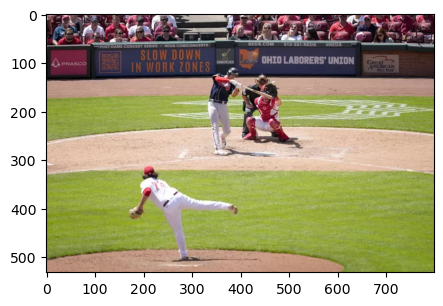

In [2]:
img = readImage('./input/base.png')
showImage(img)

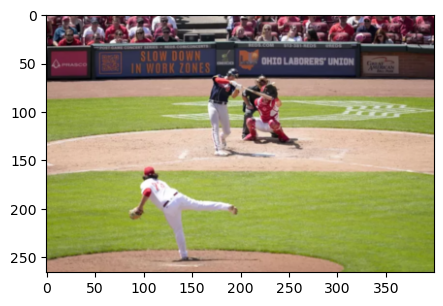

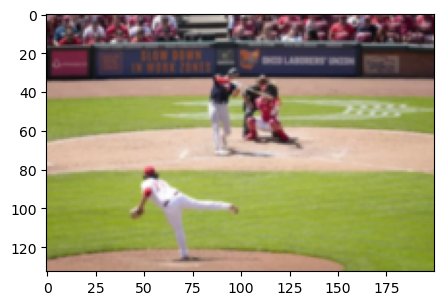

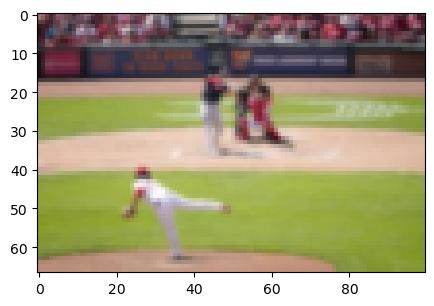

In [6]:
dest = cv.pyrDown(img)
showImage(dest)
dest = cv.pyrDown(dest)
showImage(dest)
dest = cv.pyrDown(dest)
showImage(dest)

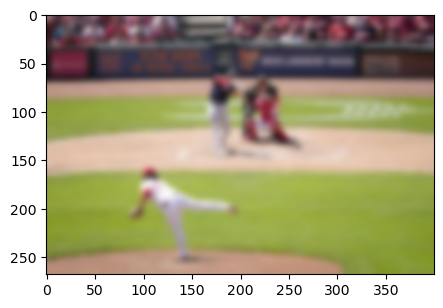

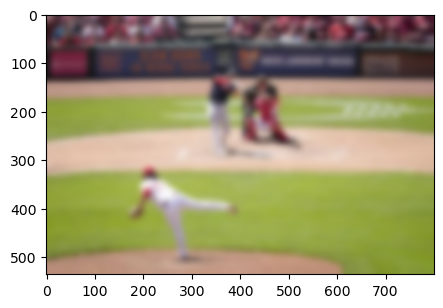

In [8]:
dest = cv.pyrUp(dest)
showImage(dest)
dest = cv.pyrUp(dest)
showImage(dest)

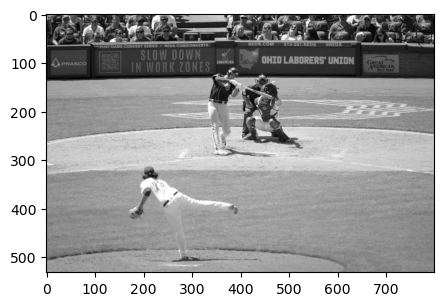

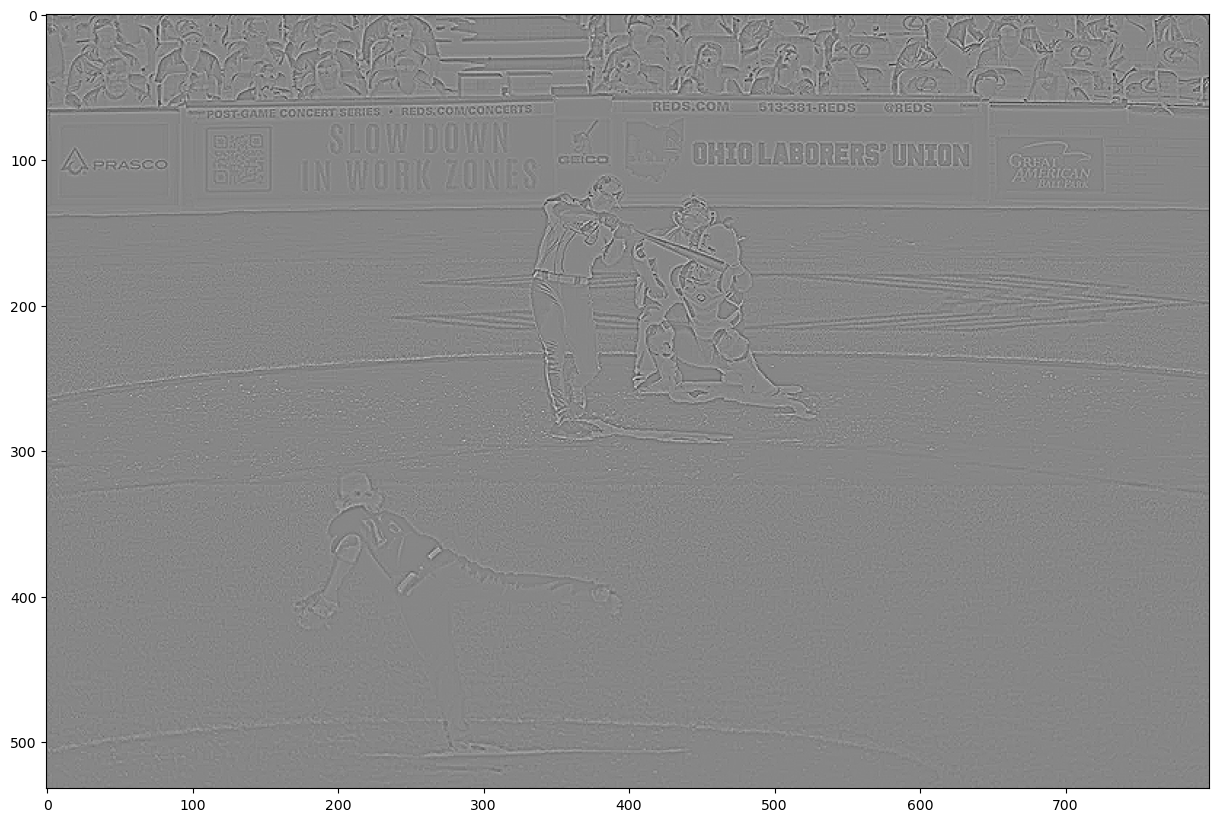

In [27]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# ret, img_binary = cv.threshold(img_gray, 127, 255, cv.THRESH_BINARY, cv.THRESH_OTSU)
showImage(img_gray, cmap='gray')
# showImage(img_binary, cmap='gray')
dest = cv.Laplacian(img_gray.astype(np.float32), cv.CV_32F, 3)
showImage(dest, cmap='gray', figsize=(15, 15))

In [44]:
A = cv.resize(readImage('./input/opencv.png'), (320, 400)
B = cv.resize(readImage('./input/perspect_test.png'), (320, 400))
A.shape, B.shape

SyntaxError: invalid syntax (1273982488.py, line 2)

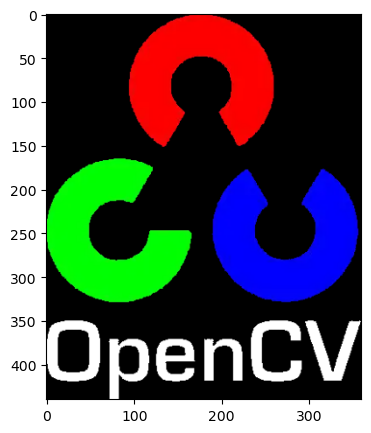

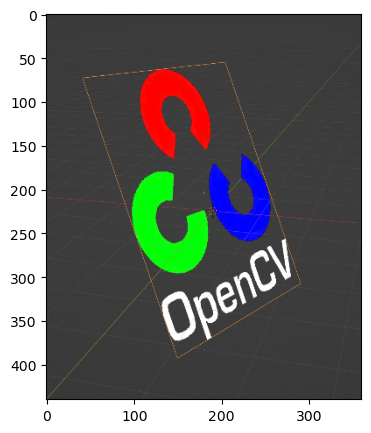

In [45]:
showImage(A)
showImage(B)

In [46]:
# 生成A的高斯金字塔
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# 生成B的高斯金字塔
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)

In [51]:
# 生成A的拉普拉斯金字塔
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    GE = cv.resize(GE, gpA[i-1].shape[:2][::-1])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# 生成B的拉普拉斯金字塔
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    GE = cv.resize(GE, gpB[i-1].shape[:2][::-1])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)

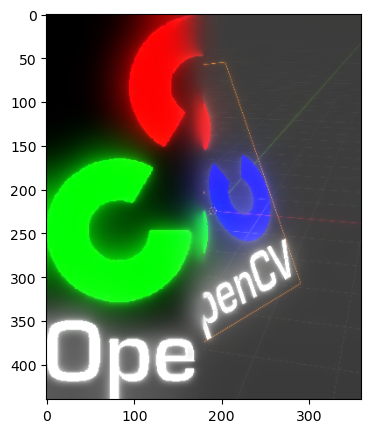

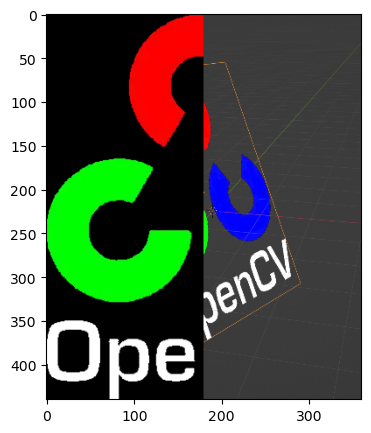

In [56]:
# 现在在每个级别中添加左右两半图像 
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# 现在重建
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.resize(ls_, LS[i].shape[:2][::-1])
    ls_ = cv.add(ls_, LS[i])
# 图像与直接连接的每一半
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
# cv.imwrite('Pyramid_blending2.jpg',ls_)
# cv.imwrite('Direct_blending.jpg',real)
## 
showImage(ls_)
showImage(real)